# Data Bootcamp Final Project
## Apprehensions of Undocumented Immigrants in the US (2000-2019)
### Diego Gonzalez Arciniega (dga263)


## Introduction

In 2019, intense media and public attention focused on the influx of Central American migrants to the US and became a major policy focus for President Donald Trump's administration. Using  data from the US Customs and Border Protection and the US Border Patrol on monthly apprehensions, this project intends to descibre, visualize, and infer **the implications of illegal immigration trends across the United States' borders in relation to rates of apprehension and Border Patrol Agency staffing policies over the past two decades.** 

Understanding changing migration trends over the last 19 years may help governments develop better immigration-related policies. This project discusses recent migrant apprehension trends in the US by describing how unauthorized migration to the U.S. has evolved in absolute terms as well as their demographic composition (Mexican vs. non-Mexican). 

Specifically, I have chosen to look at the rates of apprehension of unauthorized migrants because historically, apprehension statistics have been used as a rough measure of trends in unauthorized migration flows. As there is no official way to measure this type of migration due to its untraceable nature, rates of apprehension can best-serve as a general indicator to the extent of and demographics partaking in this type of migration. 

Additionally, I am analysing the trends in Border Patrol Agency staffing policies because it can provide insight into rates of effectiveness of anti-unauthorized migration policies while simultaneoulsy helping to explain trends within rates of migration. The changes in Border Patrol Agency staffing policies happen as a direct result of the overall migration policies determined by the Executive Head of State (US President), as they control all agencies of federal government, including the US Border Patrol and the Department of Homeland Security. Because of the role that the US Executive Chief has on Border Patrol policies, I have divided my analysis into different periods of time that correspond to different presidential administrations.

## Set Up

Let's begin by downloading the necessary packages used for this project. 

In [38]:
# Makes plot outputs appear and be stored within the notebook
%matplotlib inline 

# Importing packages to manipulate and visualize data
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [39]:
%matplotlib inline

# Specifying the style of the plots 
mpl.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## Retrieving Data

The U.S. Customs and Border Protection (CBP) publishes data anually on their website (https://www.cbp.gov/newsroom/media-resources/stats), but are only available on a PDF format. I found a researcher from the University of Pennsylvania –Jacob Kaplan– who took all of the CBS's public files, scraped the tables in the PDFs and made the data publically available in different formats including .csv and Excel. His GitHub repository is the main soruce for the data used in this project and is available here: https://github.com/jacobkap/borderpatrol

In [40]:
# Apprehensions by month and by location
url_1= "https://github.com/jacobkap/borderpatrol/raw/master/data/clean/family_child_total_monthly_2000_2018.csv"
df = pd.read_csv(url_1)

# Mexican Apprehensions vs. non-Mexican Apprehensions
url_2 = "https://github.com/jacobkap/borderpatrol/raw/master/data/clean/other_than_mexico_apprehensions_2000_2018.csv"
df_mexican = pd.read_csv(url_2)

# Number of Agents employed by the Border Patrol
url_3 = "https://github.com/jacobkap/borderpatrol/raw/master/data/clean/border_patrol_staffing_1992_2018.csv"
df_staff = pd.read_csv(url_3)

In [41]:
df.shape

(6006, 6)

In [42]:
df.head(5)

,sector,fiscal_year,month,total_apprehensions,unaccompanied_child_apprehension,family_apprehensions
0,big bend,2018,october,819.0,126.0,109.0
1,big bend,2018,november,828.0,148.0,120.0
2,big bend,2018,december,802.0,140.0,113.0
3,big bend,2018,january,543.0,66.0,21.0
4,big bend,2018,february,838.0,76.0,18.0


The df dataframe has 6006 observations and will be used as the main source for our analysis. 

## Total Apprehensions

The dataset includes yearly totals by sector (location), as well as nationwide, southwest, northern and coastal totals by month. In order to avoid double counting and get the correct yearly totals, I applied the following method: 

In [43]:
# Create a new dataframe that contains the yearly totals for all locations
# filtering out regional totals 
yearly_totals = df.loc[(df["month"] == "yearly total")
                & (~df["sector"].isin(["nationwide total", "southwest border", "northern border", 
                "coastal border"]))]

# Add all total apprehensions per year 
res = yearly_totals.groupby(by = ["fiscal_year"]).agg({"total_apprehensions": sum})
print(res)

             total_apprehensions
fiscal_year                     
2000                   1676438.0
2001                   1266214.0
2002                    955310.0
2003                    931557.0
2004                   1160395.0
2005                   1189075.0
2006                   1089092.0
2007                    876704.0
2008                    723825.0
2009                    556041.0
2010                    463382.0
2011                    340252.0
2012                    364768.0
2013                    420789.0
2014                    486651.0
2015                    337117.0
2016                    415816.0
2017                    310531.0
2018                    404142.0


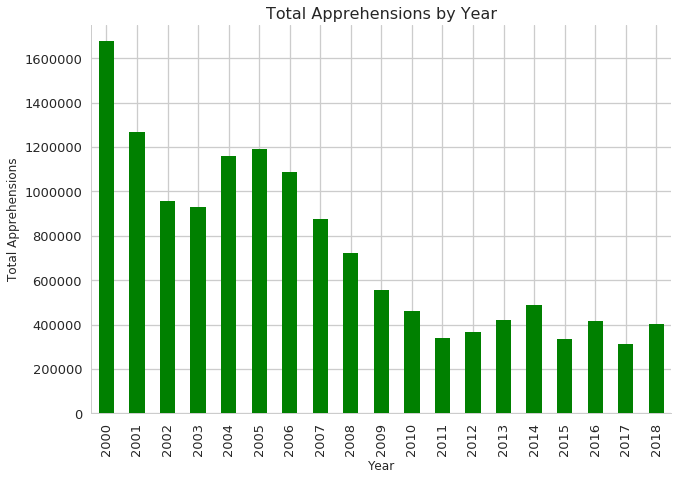

In [44]:
fig, ax = plt.subplots() # Create an empty figure and specify its settings below

res["total_apprehensions"].plot(ax=ax, 
                                kind="bar",
                                color="green",
                                linewidth=2)
ax.set_title("Total Apprehensions by Year", fontsize = 16)
ax.set_ylim(0,1750000)

ax.set_ylabel("Total Apprehensions", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

From 2000 to 2018 unauthorized migration flows –measured in this project by number of apprehensions– had been generally declining. After reaching a peak of 1,676,438 in 2000, apprehensions fell to a historic low 310,531 apprehensions in 2017. In 2018, border arrests increased to 404,142 and according to the Pew Research Center, in 2019, they [more than doubled to 851,508](https://www.pewresearch.org/fact-tank/2019/11/01/whats-happening-at-the-u-s-mexico-border-in-5-charts/).

However, this data cannot explain whether this decrease was caused by immigrants being discouraged to attempt to cross the border, more innefective enforcement at the border, or both. 

## Monthly Apprehensions


In [45]:
monthly_totals = df.loc[(df['month'] != 'yearly total') 
                & (~df['sector'].isin(['nationwide total', 'southwest border', 'northern border', 
                'coastal border']))]
mte = monthly_totals.groupby(by=["month"]).agg({'total_apprehensions': sum})
mte.index = mte.index.str.capitalize()

In [46]:
# Re-ordering months chronologically
new_order = ['January', 'February', 'March', 'April', 'May',
             'June', 'July', 'August', 'September', 'October', 'November', 'December']

mte_2 = mte.reindex(new_order, axis=0)
print(mte_2)

           total_apprehensions
month                         
January              1206832.0
February             1401199.0
March                1726854.0
April                1550219.0
May                  1395827.0
June                 1105784.0
July                 1048132.0
August               1065911.0
September             947926.0
October               968084.0
November              840428.0
December              710903.0


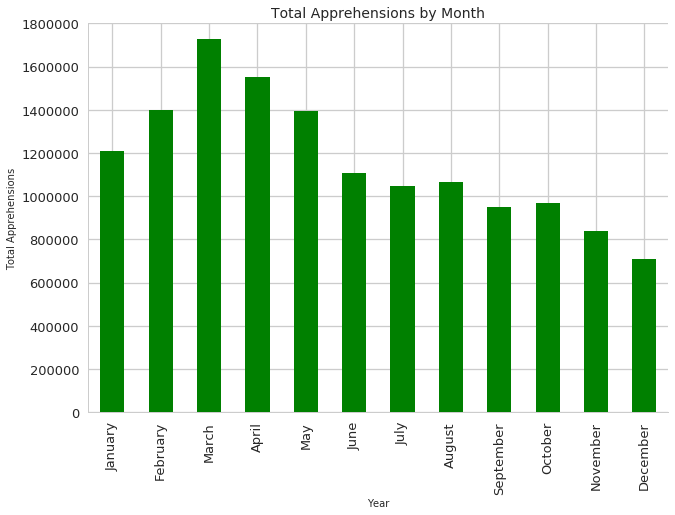

In [47]:
fig, ax = plt.subplots()

mte_2["total_apprehensions"].plot(ax=ax, 
                                kind="bar", 
                                color="green",
                                linewidth=2)
ax.set_title("Total Apprehensions by Month", fontsize = 14)
ax.set_ylim(0,1800000)

ax.set_ylabel("Total Apprehensions", fontsize=10)
ax.set_xlabel("Year", fontsize=10)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

Initially, I hypothisized that more people would attempt to cross the border during summer (June, July and August) since migrants would end their employment contracts during summer. However, the graph above does not support this idea, probably because most migrants have blue-collar jobs in developing countries which are usually less formal, and so they are more flexible when it comes to deciding when to attempt to cross the border. The graph above shows that Febrary, March, April and May are the months that have the highest number of total apprehensions. The Wall Street Journal explains that: ["border arrests typically rise in the spring (March, April and May) when temperatures warm](https://www.wsj.com/articles/in-reversal-of-spring-crisis-border-arrests-drop-for-sixth-straight-month-11575912090). 

## Apprehensions by State

In this section we investigate which states have had the highest number of total apprehensions from 2000 to 2018. 

In [48]:
# Create a new dataframe that adds all apprehensions per sector/location
map_df = yearly_totals.groupby(by=['sector']).agg({'total_apprehensions': sum})

# Dictionary that groups all borders with their respective State 
states = {"Texas": ["big bend", "del rio", "el paso", "laredo", "rio grande valley"],
          "Washington":["blaine", "spokane"],
          "New York": ["buffalo"],
          "Michigan": ["detroit"],
          "California": ["el centro", "san diego", "livermore"],
          "North Dakota": ["grand forks"],
          "Montana": ["havre"],
          "Maine": ["houlton"],
          "Florida": ["miami"],
          "Louisiana": ["new orleans"],
          "Puerto Rico": ["ramey"],
          "Vermont": ["swanton"],
          "Arizona": ["tucson", "yuma"]}

# Adding total number of apprehensions for each state 
inv_states = {}
for key in states.keys():
    for el in states[key]:
        inv_states[el] = key
        
states_df = {'state': list(states.keys()), 'apprehensions': [0 for x in states.keys()]}
for ind, row in map_df.iterrows():
   states_df['apprehensions'][states_df['state'].index(inv_states[ind])] += row['total_apprehensions']

# Saving new dataframe as a .csv file
pd.DataFrame(states_df).to_csv('processed_data.csv', index=False)

[]

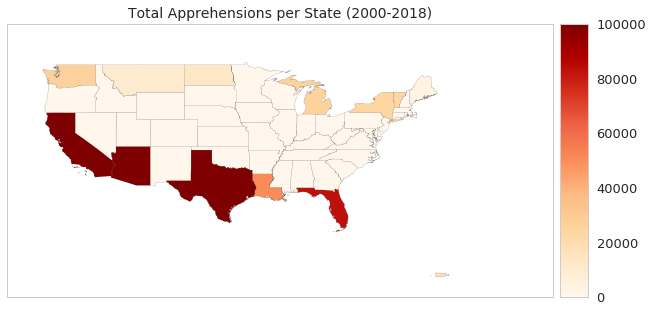

In [49]:
# Generating the US map 

gdf = gpd.read_file('geo_data/cb_2018_us_state_500k.shp')[['NAME', 'geometry']]
df = pd.read_csv('processed_data.csv')
gdf = gdf[~gdf['NAME'].isin(['United States Virgin Islands', 'American Samoa', 
                             'Hawaii', 'Guam', 'Commonwealth of the Northern Mariana Islands'])]

apprehensions = {}
for _, row in df.iterrows():
    apprehensions[row['state']] = row['apprehensions']

appr_list = []
for _, row in gdf.iterrows():
    try:
        appr_list.append(apprehensions[row['NAME']])
    except:
        appr_list.append(0)

    if appr_list[-1] > 100000:
        appr_list[-1] = 100000

gdf['apprehensions'] = appr_list

fig, ax = plt.subplots(1, 1)
ax.set_title("Total Apprehensions per State (2000-2018)", fontsize = 14)
ax.set_xlim(left=-130, right=-50)
ax.set_ylim(bottom=15, top=55)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

gdf.plot(column='apprehensions', ax=ax, cmap='OrRd', legend=True, edgecolor='black', linewidth=0.1, cax=cax)
ax.set_yticks([])
ax.set_xticks([])

The map above shows the total number of apprehensions from 2000 to 2018 by state. As it can be seen observed, the states with the most number of apprehensions are Arizona (5.68 million), Texas (5.22 million) and California (2.78 million). The states with the least number of apprehensions were Maine (3,163), Montana (10,474) and North Dakota (12,998). Visually, we can observe that the southern states have the most number of apprehensions –this unsurprising trend seems logical as Mexicans and Central Americans travel up north, attempting to cross a US southern border.

## Mexican Apprehensions vs. Non-Mexican Apprehensions

In [50]:
mxa = df_mexican.loc[(~df_mexican['sector'].isin(['nationwide total', 
                    'southwest border', 'northern border', 'coastal border']))]
mx = mxa.groupby(by=["fiscal_year"]).agg({'total_apprehensions': sum,
                                    'mexican_apprehensions': sum,'other_than_mexican_apprehensions': sum })
mx.rename(columns = {'total_apprehensions':'Total Apprehensions', 'mexican_apprehensions':'Mexican Apprehensions', 
                              'other_than_mexican_apprehensions':'Non-Mexican Apprehensions'}, inplace = True)
mx.head()

,Total Apprehensions,Mexican Apprehensions,Non-Mexican Apprehensions
fiscal_year,,,
2000,1676438.0,1636883.0,39555.0
2001,1266214.0,1224047.0,42167.0
2002,955310.0,917993.0,37317.0
2003,931557.0,882012.0,49545.0
2004,1160395.0,1085006.0,75389.0


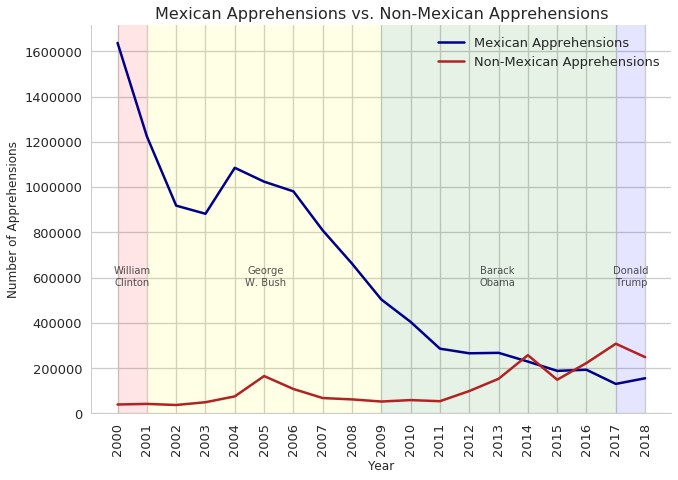

In [51]:
fig, ax = plt.subplots() 
mx["Mexican Apprehensions"].plot(ax = ax, 
                            linewidth = 2.5, color = "darkblue", legend = True, xticks=mx.index.values.tolist())
mx["Non-Mexican Apprehensions"].plot(ax = ax, 
                            linewidth = 2.5, color = "firebrick", legend = True, xticks=mx.index.values.tolist())

ax.set_title("Mexican Apprehensions vs. Non-Mexican Apprehensions", fontsize = 16)
ax.set_ylabel("Number of Apprehensions", fontsize = 12)
ax.set_xlabel("Year", fontsize = 12)
ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 
ax.set_ylim(0)

# Different background colors for different US Presidents
ax.axvspan(2000, 2001, facecolor="red", alpha=0.1) # William Clinton
plt.text(0.07, 0.36, 'William', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.07, 0.33, 'Clinton', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)

ax.axvspan(2001, 2009, facecolor="yellow", alpha=0.1) # George W. Bush
plt.text(0.30, 0.36, 'George', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.30, 0.33, 'W. Bush', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)

ax.axvspan(2009, 2017, facecolor="green", alpha=0.1) # Barack Obama
plt.text(0.70, 0.36, 'Barack', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.70, 0.33, 'Obama', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)

ax.axvspan(2017, 2018, facecolor="blue", alpha=0.1) # Donald Trump
plt.text(0.93, 0.36, 'Donald', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.93, 0.33, 'Trump', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)


ax.set_xticklabels(mx.index.values.tolist(), rotation=90) # Setting the x-axis 

plt.show()

Historically, Mexican immigrants represented the largest share of undocummented arrivals to the US. In 2000, more than 1.6 million of Mexicans were apprehended at the border – or 97.64% of the total apprehensions that year. However, inY2014, the number of non-Mexican apprehensions exceeded the number of Mexican apprehensions for the first time. In 2018, there were roughly 155,000 Mexican apprehensions, while the number of non-Mexican apprehensions exceeded 240,000. Mexicans now make up fewer than half of the nation's total apprehensions. This change is explained by increasing inflow of undocummented immigrants from Central America –[particularly Guatemala, El Salvador and Honduras](https://www.migrationpolicy.org/article/central-american-immigrants-united-states). Immigration from Mexico, on the other hand, has decreased since the Great Recession mainly because the Mexican economy is doing better and the country shifts towards an aging population where workers are less likely to migrate to other countries. 

Finally, the overall increase in non-Mexican apprehensions in the past decade has not been very significant as I initially thought. This is partially attributed to Mexican President Andrés Manuel López Obrador’s deployment of Mexican National Guard troops at the souther border with Guatemala to stem the inflow of migrants from Central America who are attempting to travel north to the United States. This enforcement has naturally reduced the number of migrants of Central Americans that reach the US. López Obrador agreed to this anti-migrant measures after Donal Trump threatened to [impose tariffs of up to 25% on Mexican imports](https://www.texastribune.org/2019/07/09/number-immigrants-apprehended-us-mexico-border-dropped-june-2019/). 

## Number of Agents Employed by the Border Patrol 

In [52]:
staff_1 = df_staff.loc[(~df_staff['sector'].isin(['nationwide total', 
                    'southwest border', 'northern border', 'coastal border']))]
staff_2 = staff_1.groupby(by=["fiscal_year"]).agg({'number_of_agents': sum})
staff_3 = staff_2[staff_2.index >= 2000] # Create a new dataframe with the years we are interested in
staff_3.rename(columns = {'number_of_agents':'Number of Agents'}, inplace = True) 
staff_3.head()

/Users/Diego/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Number of Agents
fiscal_year,
2000,9036.0
2001,9635.0
2002,9874.0
2003,10561.0
2004,10645.0


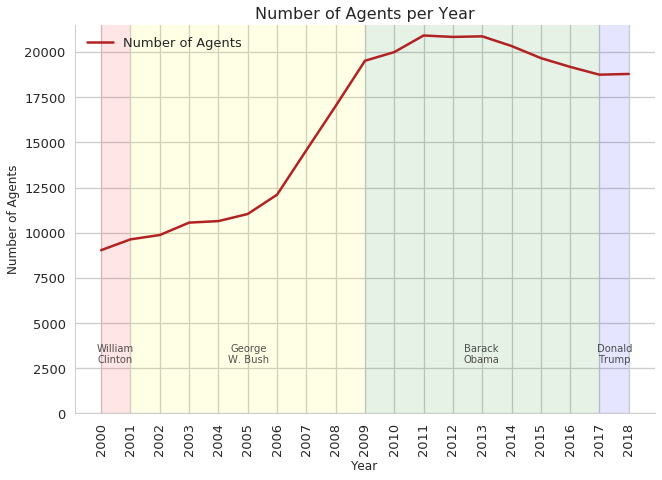

In [53]:
fig, ax = plt.subplots() 

staff_3["Number of Agents"].plot(ax = ax, 
                            linewidth = 2.5, color = "firebrick", legend = True, xticks=mx.index.values.tolist())

ax.set_title("Number of Agents per Year", fontsize = 16)
ax.set_ylabel("Number of Agents", fontsize = 12)
ax.set_xlabel("Year", fontsize = 12)
ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 
ax.set_ylim(0)

# Different background colors for different US Presidents
ax.axvspan(2000, 2001, facecolor="red", alpha=0.1) # William Clinton
plt.text(0.07, 0.16, 'William', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.07, 0.13, 'Clinton', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)

ax.axvspan(2001, 2009, facecolor="yellow", alpha=0.1) # George W. Bush
plt.text(0.30, 0.16, 'George', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.30, 0.13, 'W. Bush', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)

ax.axvspan(2009, 2017, facecolor="green", alpha=0.1) # Barack Obama
plt.text(0.70, 0.16, 'Barack', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.70, 0.13, 'Obama', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)

ax.axvspan(2017, 2018, facecolor="blue", alpha=0.1) # Donald Trump
plt.text(0.93, 0.16, 'Donald', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.93, 0.13, 'Trump', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)

ax.set_xticklabels(mx.index.values.tolist(), rotation=90) # Setting the x-axis 

plt.show()

The graph above shows that during George W. Bush's presidency, the number of agents employed by the Border Patrol increased substantially. During Obama's and Trump's administration, these numbers evened out. These number reflect stricter anti-migration attitudes and enforcement –despise its high costs. In fact, since the creation of the Department of Homeland Security in 2003, [the US government has spent 324 USD billion on all the agencies that carry out immigration enforcement](https://www.americanimmigrationcouncil.org/research/the-cost-of-immigration-enforcement-and-border-security)

It is important not only to review how much money has been allocated on anti-migration enforcement, but also how effective the enforcement has been. In the next section, I calculate the ratio of total apprehensions per year to the total number of agents per year. This metric will hopefully shed light upon the effect of emplying more agents at the borders on apprehension rates.

# Ratio of Total Apprehensions to Total Number of Agents

In [54]:
# Calculating the ratio of total apprehensions per year to total number of agents per year
staff_3["Staff Ratio"] = mx["Total Apprehensions"] / staff_3["Number of Agents"]
print(staff_3)

             Number of Agents  Staff Ratio
fiscal_year                               
2000                   9036.0   185.528774
2001                   9635.0   131.418163
2002                   9874.0    96.750051
2003                  10561.0    88.207272
2004                  10645.0   109.008455
2005                  11039.0   107.715826
2006                  12104.0    89.977859
2007                  14567.0    60.184252
2008                  17014.0    42.542906
2009                  19518.0    28.488626
2010                  19997.0    23.172576
2011                  20916.0    16.267546
2012                  20838.0    17.504943
2013                  20870.0    20.162386
2014                  20335.0    23.931694
2015                  19667.0    17.141252
2016                  19180.0    21.679666
2017                  18748.0    16.563420
2018                  18789.0    21.509500


/Users/Diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


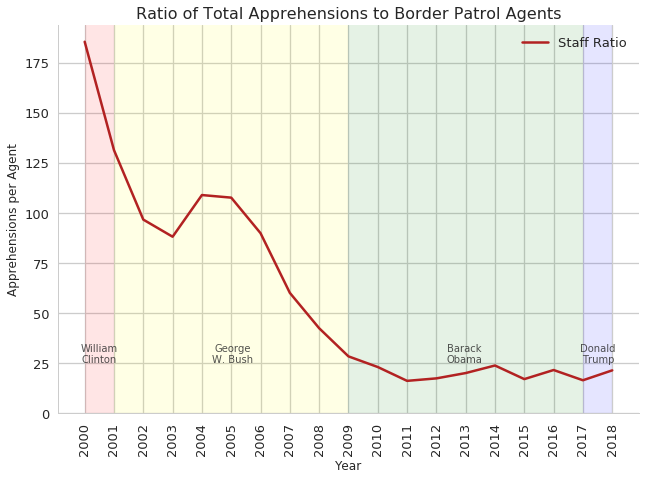

In [55]:
fig, ax = plt.subplots() 

staff_3["Staff Ratio"].plot(ax = ax, 
                            linewidth = 2.5, color = "firebrick", legend = True, xticks=mx.index.values.tolist())

ax.set_title("Ratio of Total Apprehensions to Border Patrol Agents", fontsize = 16)
ax.set_ylabel("Apprehensions per Agent", fontsize = 12)
ax.set_xlabel("Year", fontsize = 12)
ax.spines["right"].set_visible(False) 
ax.spines["top"].set_visible(False) 
ax.set_ylim(0)

# Different background colors for different US Presidents
ax.axvspan(2000, 2001, facecolor="red", alpha=0.1) # William Clinton
plt.text(0.07, 0.16, 'William', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.07, 0.13, 'Clinton', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)

ax.axvspan(2001, 2009, facecolor="yellow", alpha=0.1) # George W. Bush
plt.text(0.30, 0.16, 'George', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.30, 0.13, 'W. Bush', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)

ax.axvspan(2009, 2017, facecolor="green", alpha=0.1) # Barack Obama
plt.text(0.70, 0.16, 'Barack', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.70, 0.13, 'Obama', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)

ax.axvspan(2017, 2018, facecolor="blue", alpha=0.1) # Donald Trump
plt.text(0.93, 0.16, 'Donald', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)
plt.text(0.93, 0.13, 'Trump', horizontalalignment='center', transform=ax.transAxes, alpha=0.8)

ax.set_xticklabels(mx.index.values.tolist(), rotation=90) # Setting the x-axis 

plt.show()

The "Staff Ration," and the graph above can be interpreted in the following way: in 2000, there were over 175 apprehensions per agent; in 2018, there were less than 25 per agent. 

## Conclusion 

Less people are being apprehended, yet considerably more border patrol agents are being employed. This could mean that border patrol agents have a lower "success rate" (i.e. agents are less capable of stopping migrants from crossing the border). However, there is no way to possibly assess the validity of this argument because apprehension statistics only account for arrests at the border; they do not measure how many people actually cross the border. Thus, it is extremely hard to assess the Border Patrol's "success rate." Nonetheless, this argument seems rather weak because there are new technologies such as drones and sensors that make it easier to identify when migrants cross the border. 

Alternatively, the high number of Border Patrol agents may dissuade migrants from even attempting to cross the border. Thus, naturally reducing the total number of apprehensions. However this argument says nothing about the "sucess rate" of agents at apprehending undocummented immigrants, and is also extremely hard to assess whether a high number of agents, does in fact, disincentivize potential immigrants. 

Furthermore, although the total number of apprehensions has decreased, the portion of non-Mexican apprehensions continues to increase, particularly from Central America. This change in unauthorized migration flows can be thought as an international humanitarian crisis resulting from violent and lawless circumstances in migrants' countries of origin –particularly from El Salvador, Guatemala and Honduras. In response to the large increase in arrivals of undocummented migrants, the Trump administration has implemented the Migrant Protection Protocols (MPP) in 2019 –commonly known as the "remain in Mexico" immigration policy"– which sends migrants back to Mexico to await for their court proceedings for the duration of their case. This policy may distort apprehension statistics. 

The changing underlying motivations and recent border migration strategies makes apprehension data less useful than in the past for measuring border enforcement and are less accurate in capturing unauthorized migration flows. 